<a href="https://colab.research.google.com/github/Saif-crypt/Utilities-Boiler-Final/blob/main/boiler_Ml_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHASE 4: PREDICTIVE MODELING & OPTIMIZATION

# STEP 1:Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style for plots
plt.style.use('default')
sns.set_palette("viridis")
%matplotlib inline

# STEP 2:Upload the Phase 2 results file

In [3]:
print("📤 Please upload the 'boiler_data_with_efficiency.csv' file from Phase 2:")
uploaded = files.upload()

📤 Please upload the 'boiler_data_with_efficiency.csv' file from Phase 2:


Saving boiler_data_with_efficiency.csv to boiler_data_with_efficiency.csv


# STEP 3:Load the data

In [4]:
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, index_col='Date', parse_dates=['Date'])

print(f"✅ File '{file_name}' loaded successfully!")
print(f"Dataset Shape: {df.shape}")

✅ File 'boiler_data_with_efficiency.csv' loaded successfully!
Dataset Shape: (33, 37)


# STEP 4:Data Preparation for Machine Learning (FIXED)

In [5]:
print("\n" + "="*60)
print("DATA PREPARATION FOR MACHINE LEARNING")
print("="*60)

# First, let's check all columns and their data types
print("--- Column Data Types ---")
print(df.dtypes)

# Identify numeric columns only (exclude text columns)
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove the target variable from features
if 'Efficiency_%' in numeric_columns:
    numeric_columns.remove('Efficiency_%')

# Remove other calculated columns that might cause issues
columns_to_exclude = ['Conversion_Rate', 'Total_Fuel_Corrected', 'Boiler_Yield']
numeric_columns = [col for col in numeric_columns if col not in columns_to_exclude]

print(f"\nAvailable numeric features for prediction: {len(numeric_columns)}")
print("Numeric features:", numeric_columns)

# Prepare data for modeling
X = df[numeric_columns].copy()
y = df['Efficiency_%'].copy()

# Handle missing values (simple imputation - using median which is more robust)
print(f"\nMissing values before cleaning:")
print(X.isnull().sum())

# Fill missing values with median (more robust than mean)
for col in X.columns:
    if X[col].isnull().any():
        X[col] = X[col].fillna(X[col].median())

print(f"\nMissing values after cleaning:")
print(X.isnull().sum())

print(f"Final features shape: {X.shape}")
print(f"Target shape: {y.shape}")


DATA PREPARATION FOR MACHINE LEARNING
--- Column Data Types ---
boiler                                                       object
ng_meter_m3                                                   int64
boiler_steam_tons                                             int64
feed_water_kl                                                 int64
hp_steam_tons                                                 int64
lp_steam_kg                                                  object
soft_water_inlet_kl                                           int64
soft_water_outlet_kl                                          int64
ng_skid_converted                                           float64
ng_skid_unconverted                                           int64
cereal_condensate_ltr                                        object
da_makeup_tank_kl                                             int64
Avg_Feed_Water_Tank_Level_(50 to 70%)                       float64
Avg_Feed_Water_Tank_Temperature_(102 to 105 C)     

# STEP 5:Train-Test Split

In [6]:
print("\n" + "="*60)
print("TRAIN-TEST SPLIT")
print("="*60)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")


TRAIN-TEST SPLIT
Training set: 26 samples
Testing set: 7 samples


# STEP 6:Train Machine Learning Model

In [7]:
print("\n" + "="*60)
print("TRAINING MACHINE LEARNING MODEL")
print("="*60)

# Initialize and train Random Forest model
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5
)

model.fit(X_train, y_train)
print("✅ Random Forest model trained successfully!")


TRAINING MACHINE LEARNING MODEL
✅ Random Forest model trained successfully!


# STEP 7:Model Evaluation

In [8]:
print("\n" + "="*60)
print("MODEL EVALUATION")
print("="*60)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}%")
print(f"R² Score: {r2:.3f}")
print(f"Average Efficiency: {y_test.mean():.2f}%")
print(f"Error as % of average: {(mae/y_test.mean()*100):.1f}%")


MODEL EVALUATION
Mean Absolute Error: 0.50%
R² Score: 0.566
Average Efficiency: 77.83%
Error as % of average: 0.6%


# STEP 8:Feature Importance Analysis

In [9]:
print("\n" + "="*60)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*60)

# Get feature importances
feature_importance = pd.DataFrame({
    'feature': numeric_columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features for Efficiency:")
print(feature_importance.head(10))


FEATURE IMPORTANCE ANALYSIS
Top 10 Most Important Features for Efficiency:
                                              feature  importance
14                           Avg_Boiler1_Modulation_%    0.148295
18                    Avg_BOILER1_A.P.H_FLUE_GAS_O2_%    0.104394
8                                   da_makeup_tank_kl    0.090381
17  Avg_BOILER1_A.P.H_FLUE_GAS_INLET_TEMPERATURE_(...    0.079396
15  Avg_Boiler1_F.D_FAN_AIR_Temperature_(OUTLET_TE...    0.068865
19                          Avg_Chimney_Temperature_C    0.048964
16  Avg_BOILER1_A.P.H_FLUE_GAS_OUTLET_TEMPERATURE_...    0.047074
7                                 ng_skid_unconverted    0.040369
13                    Avg_Boiler1_Drum_Steam_Pressure    0.038829
6                                   ng_skid_converted    0.036947


# STEP 9:Create Visualizations


CREATING PREDICTION VISUALIZATIONS


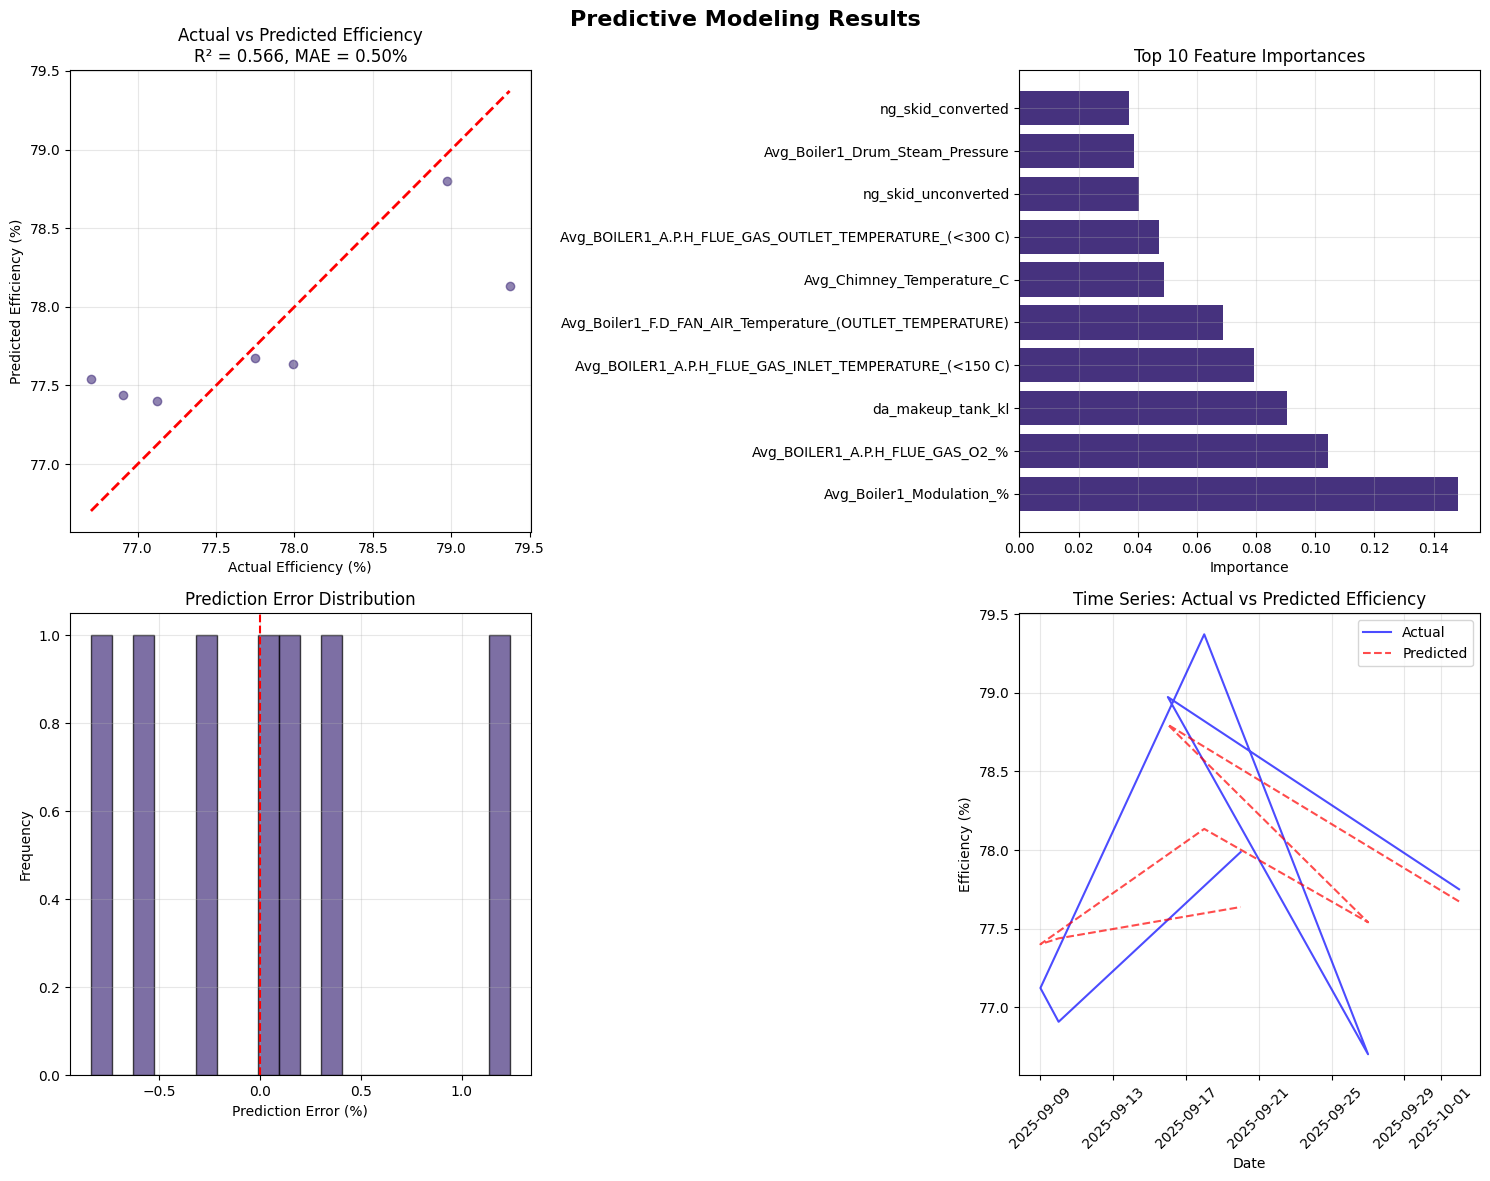

In [10]:
print("\n" + "="*60)
print("CREATING PREDICTION VISUALIZATIONS")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Predictive Modeling Results', fontsize=16, fontweight='bold')

# Plot 1: Actual vs Predicted Efficiency
axes[0, 0].scatter(y_test, y_pred, alpha=0.6)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Efficiency (%)')
axes[0, 0].set_ylabel('Predicted Efficiency (%)')
axes[0, 0].set_title(f'Actual vs Predicted Efficiency\nR² = {r2:.3f}, MAE = {mae:.2f}%')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Feature Importance
top_features = feature_importance.head(10)
axes[0, 1].barh(range(len(top_features)), top_features['importance'])
axes[0, 1].set_yticks(range(len(top_features)))
axes[0, 1].set_yticklabels(top_features['feature'])
axes[0, 1].set_xlabel('Importance')
axes[0, 1].set_title('Top 10 Feature Importances')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Prediction Error Distribution
errors = y_test - y_pred
axes[1, 0].hist(errors, bins=20, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(0, color='red', linestyle='--')
axes[1, 0].set_xlabel('Prediction Error (%)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Prediction Error Distribution')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Time Series of Actual vs Predicted
test_dates = y_test.index
axes[1, 1].plot(test_dates, y_test, 'b-', label='Actual', alpha=0.7)
axes[1, 1].plot(test_dates, y_pred, 'r--', label='Predicted', alpha=0.7)
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Efficiency (%)')
axes[1, 1].set_title('Time Series: Actual vs Predicted Efficiency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# STEP 10:Optimization Recommendations

In [11]:
print("\n" + "="*60)
print("OPTIMIZATION RECOMMENDATIONS")
print("="*60)

# Analyze top features for optimization
top_3_features = feature_importance.head(3)['feature'].tolist()

print("🔧 OPTIMIZATION OPPORTUNITIES:")
for i, feature in enumerate(top_3_features, 1):
    corr = df[feature].corr(df['Efficiency_%'])
    direction = "increase" if corr > 0 else "decrease"
    print(f"{i}. Focus on '{feature}' - {direction} this parameter to improve efficiency")
    print(f"   (Correlation with efficiency: {corr:.3f})")


OPTIMIZATION RECOMMENDATIONS
🔧 OPTIMIZATION OPPORTUNITIES:
1. Focus on 'Avg_Boiler1_Modulation_%' - decrease this parameter to improve efficiency
   (Correlation with efficiency: -0.469)
2. Focus on 'Avg_BOILER1_A.P.H_FLUE_GAS_O2_%' - decrease this parameter to improve efficiency
   (Correlation with efficiency: -0.417)
3. Focus on 'da_makeup_tank_kl' - decrease this parameter to improve efficiency
   (Correlation with efficiency: -0.461)


# STEP 11:Save Predictions and Analysis

In [12]:
print("\n" + "="*60)
print("SAVING PREDICTION RESULTS")
print("="*60)

# Create dataframe with predictions
results_df = pd.DataFrame({
    'Actual_Efficiency': y_test,
    'Predicted_Efficiency': y_pred,
    'Prediction_Error': y_test - y_pred
})

# Save results
predictions_file = 'boiler_efficiency_predictions.csv'
importance_file = 'feature_importance_analysis.csv'

results_df.to_csv(predictions_file)
feature_importance.to_csv(importance_file)

print(f"✅ Predictions saved to: '{predictions_file}'")
print(f"✅ Feature importance analysis saved to: '{importance_file}'")


SAVING PREDICTION RESULTS
✅ Predictions saved to: 'boiler_efficiency_predictions.csv'
✅ Feature importance analysis saved to: 'feature_importance_analysis.csv'


# STEP 12:Download all results

In [13]:
print("\n📥 Download your prediction results:")
files.download(predictions_file)
files.download(importance_file)

print("\n" + "="*60)
print("PREDICTIVE MODELING COMPLETE! 🎉")
print("="*60)
print("Key insights generated:")
print("1. Machine learning model for efficiency prediction")
print("2. Identification of key parameters affecting efficiency")
print("3. Specific optimization recommendations")
print("4. Visualizations of model performance")


📥 Download your prediction results:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


PREDICTIVE MODELING COMPLETE! 🎉
Key insights generated:
1. Machine learning model for efficiency prediction
2. Identification of key parameters affecting efficiency
3. Specific optimization recommendations
4. Visualizations of model performance
